Please enter the following information to determine loan eligibilty from a lending institution.
Loan Approval Prediction: Approved


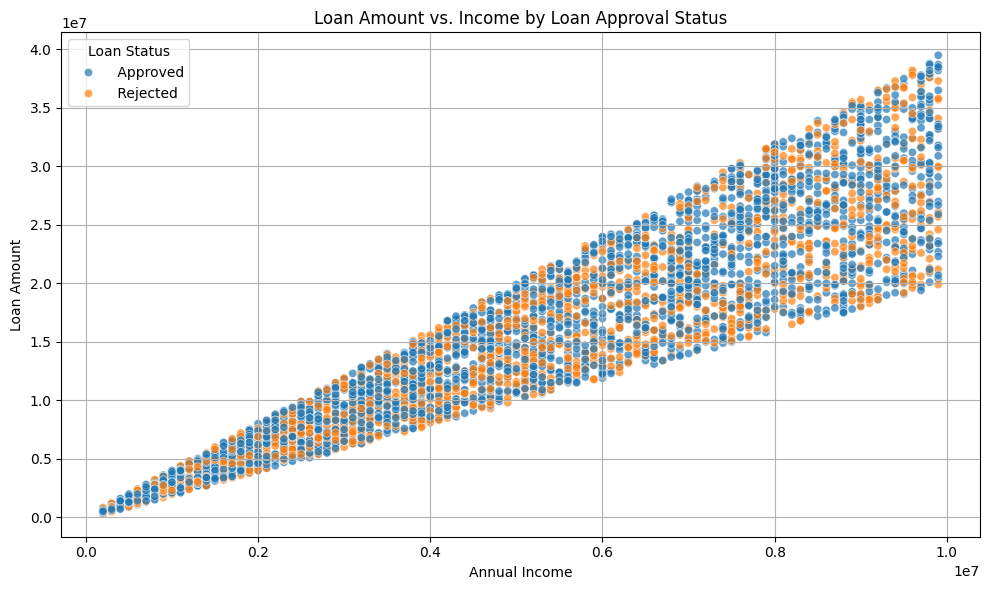

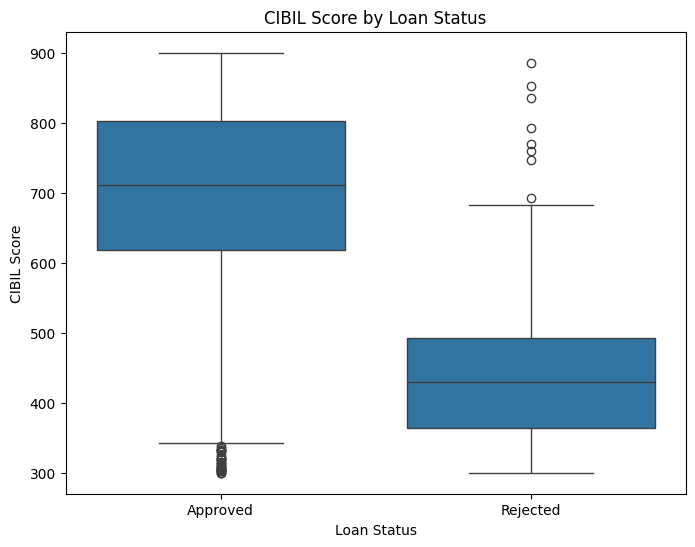

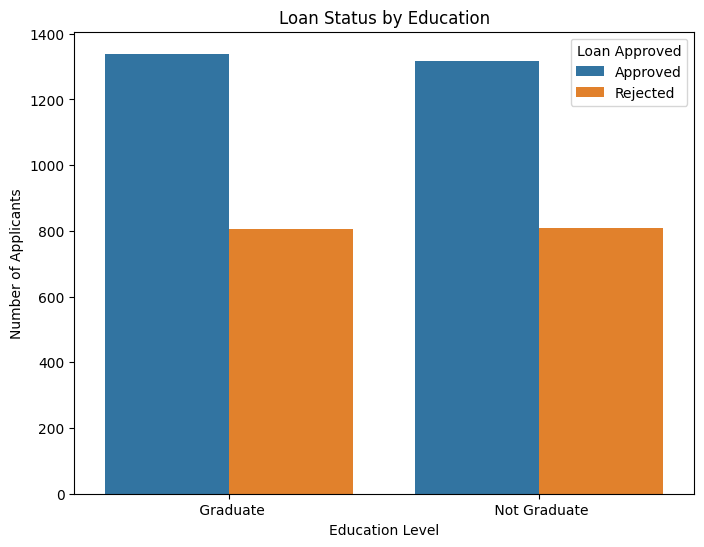

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

data = pd.read_csv('loan_approval_dataset.csv')
data.columns = data.columns.str.strip()
data.fillna(0, inplace=True)

original_data = data.copy()
original_data['loan_status'] = original_data['loan_status'].str.strip()

y = data['loan_status'].str.strip()
y = y.map({'Approved': 1, 'Rejected': 0})
X = pd.get_dummies(data.drop(['loan_status','loan_id'], axis=1))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = XGBClassifier(eval_metric='logloss')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
def predict_loan():
    new_applicant = {}
    print("Please enter the following information to determine loan eligibilty from a lending institution.")
    new_applicant['no_of_dependents'] = int(input("How many dependents do you have? "))
    new_applicant['income_annum'] = float(input("What is your annual income? (Only numbers, no commas) "))
    new_applicant['loan_amount'] = float(input("What is your desired loan amount? (Only numbers, no commas) "))
    new_applicant['loan_term'] = int(input("What is your desired loan term (in years)? "))
    new_applicant['cibil_score'] = float(input("What is your credit score? "))
    new_applicant['residential_assets_value'] = float(input("What is the value of your residential assets? "))
    new_applicant['commercial_assets_value'] = float(input("What is the value of your commercial assets? "))
    new_applicant['luxury_assets_value'] = float(input("What is the value of your luxury assets? "))
    new_applicant['bank_asset_value'] = float(input("What is the value of your bank assets? "))

    graduate = input("Are you a college graduate? (yes or no) ").strip().lower()
    if graduate == "yes":
        new_applicant['education_ Graduate'] = 1
        new_applicant['education_ Not Graduate'] = 0
    else:
        new_applicant['education_ Graduate'] = 0
        new_applicant['education_ Not Graduate'] = 1

    self_employed = input("Are you self employed? (yes or no) ").strip().lower()
    if self_employed == "yes":
        new_applicant['self_employed_ Yes'] = 1
        new_applicant['self_employed_ No'] = 0
    else:
        new_applicant['self_employed_ Yes'] = 0
        new_applicant['self_employed_ No'] = 1
    input_df = pd.DataFrame([new_applicant])
    input_df = input_df[X.columns]
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    print("Loan Approval Prediction:", "Approved" if prediction[0] == 1 else "Rejected")
predict_loan()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='income_annum', y='loan_amount', hue='loan_status', alpha=0.7)
plt.title('Loan Amount vs. Income by Loan Approval Status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=original_data)
plt.title('CIBIL Score by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='loan_status', data=original_data)
plt.title('Loan Status by Education')
plt.xlabel('Education Level')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Approved')
plt.show()

